In [1]:
import os
from simplecube import simple_cube

In [2]:
path_dir = os.path.abspath("")

In [3]:
S2_NIR_cube=simple_cube(
    data_dir=os.path.join(path_dir),
    collection="S2_L2A-1",
    start_date="2024-01-01",
    end_date="2024-12-31",
    bbox="-46.7743,-15.9686,-46.5824,-15.7992",
    bands=["B08"]
)

S2_NIR_cube

Downloading... : 100%|██████████| 73/73 [00:07<00:00,  9.92 itens/s]


Successfully download 73 files to S2_L2A-1


<xarray.Dataset> Size: 1GB
Dimensions:      (band: 1, x: 2071, y: 1892, time: 71)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 17kB 3.1e+05 3.1e+05 ... 3.306e+05 3.307e+05
  * y            (y) float64 15kB 8.253e+06 8.253e+06 ... 8.234e+06 8.234e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 568B 2024-01-04 2024-01-09 ... 2024-12-29
Data variables:
    band_data    (time, band, y, x) float32 1GB 7.756e+03 ... 6.536e+03

In [4]:
from wcpms_server import params_phenometrics, phenometrics_data_cube

/home/sansigolo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1
)

In [6]:
ds_phenos = phenometrics_data_cube(
    da=S2_NIR_cube['band_data'],
    engine='phenolopy',
    config=config
)

ds_phenos

<xarray.Dataset> Size: 313MB
Dimensions:      (band: 1, y: 1892, x: 2071)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 17kB 3.1e+05 3.1e+05 ... 3.306e+05 3.307e+05
  * y            (y) float64 15kB 8.253e+06 8.253e+06 ... 8.234e+06 8.234e+06
    spatial_ref  int32 4B 32723
    time         (band, y, x) datetime64[ns] 31MB 2024-12-24 ... 2024-03-19
Data variables: (12/18)
    pos_values   (band, y, x) float32 16MB 1.221e+04 1.222e+04 ... 1.114e+04
    pos_times    (band, y, x) float32 16MB 359.0 359.0 359.0 ... 79.0 79.0 79.0
    mos_values   (band, y, x) float32 16MB 1.207e+04 1.207e+04 ... 1e+04
    vos_values   (band, y, x) float32 16MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    vos_times    (band, y, x) float32 16MB 139.0 139.0 139.0 ... 139.0 139.0
    bse_values   (band, y, x) float32 16MB 3.926e+03 3.904e+03 ... 1.678e+03
    ...           ...
    roi_values   (band, y, x) float32 16MB 32.07 32.11 ... 1.537e+03 1.558e+03
    rod_values   (band, y, x) float32 16MB 871.2 883.2 896.8 ... 146.6 148.0
    lios_values  (band, y, x) float32 16MB 2.697e+05 2.754e+05 ... 6.85e+04
    sios_values  (band, y, x) float32 16MB 2.697e+05 2.754e+05 ... 6.85e+04
    liot_values  (band, y, x) float32 16MB 3.458e+05 3.519e+05 ... 3.678e+05
    siot_values  (band, y, x) float32 16MB 3.458e+05 3.519e+05 ... 3.678e+05
Attributes:
    grid_mapping:  spatial_ref

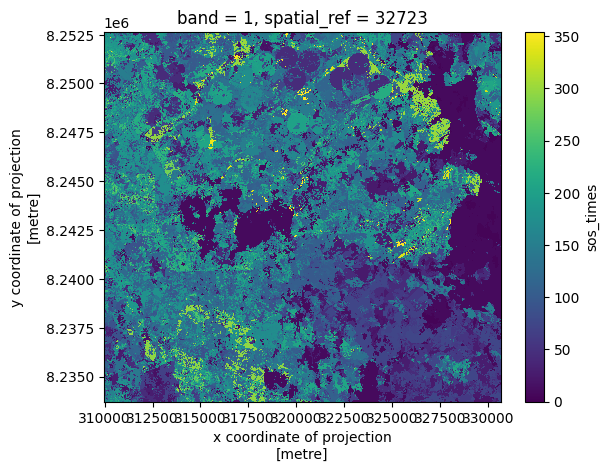

In [7]:
ds_phenos_2d = ds_phenos['sos_times']

ds_phenos_2d.plot()